In [ ]:
!pip install -q yfinance
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential, load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing dataset

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-03,130.820007,131.850006,130.070007,130.220001,130.220001,28264800,AMAZON
2023-07-05,130.240005,131.399994,129.639999,130.380005,130.380005,35895400,AMAZON
2023-07-06,128.250000,128.729996,127.370003,128.360001,128.360001,40639900,AMAZON
2023-07-07,128.589996,130.970001,128.130005,129.779999,129.779999,41928700,AMAZON
2023-07-10,129.070007,129.279999,125.919998,127.129997,127.129997,61889300,AMAZON
2023-07-11,127.750000,129.770004,127.349998,128.779999,128.779999,49951500,AMAZON
2023-07-12,130.309998,131.259995,128.830002,130.800003,130.800003,54022800,AMAZON
2023-07-13,134.039993,134.669998,132.710007,134.300003,134.300003,61170900,AMAZON
2023-07-14,134.059998,136.649994,134.059998,134.679993,134.679993,54388100,AMAZON


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-07-18,150.740005,151.570007,146.699997,147.070007,146.197021,81420900,APPLE
2022-07-19,147.919998,151.229996,146.910004,151.000000,150.103683,82982400,APPLE
2022-07-20,151.119995,153.720001,150.369995,153.039993,152.131592,64823400,APPLE
2022-07-21,154.500000,155.570007,151.940002,155.350006,154.427872,65086600,APPLE
2022-07-22,155.389999,156.279999,153.410004,154.089996,153.175354,66675400,APPLE


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1.004000e+03
mean,154.579824,156.775112,152.545468,154.753145,154.381947,5.278256e+07
std,63.459766,64.067227,62.840333,63.524932,63.076805,3.193163e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,8.567800e+06
25%,103.947498,105.901249,102.438873,104.280003,104.280003,2.665858e+07
50%,133.980003,135.860001,132.130005,133.709999,133.709999,4.601100e+07
75%,184.700001,187.214996,183.197495,184.475002,183.774982,7.056310e+07
max,296.700012,305.170013,295.269989,304.829987,304.829987,2.726620e+08


In [ ]:
# showing column wise %ge of NaN values they contains

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)


Open 	-	 0.0
High 	-	 0.0
Low 	-	 0.0
Close 	-	 0.0
Adj Close 	-	 0.0
Volume 	-	 0.0
company_name 	-	 0.0


In [ ]:
df = AAPL   # Choosin stock values for any company

Text(0.5, 1.0, 'Stock Price with Moving Averages')

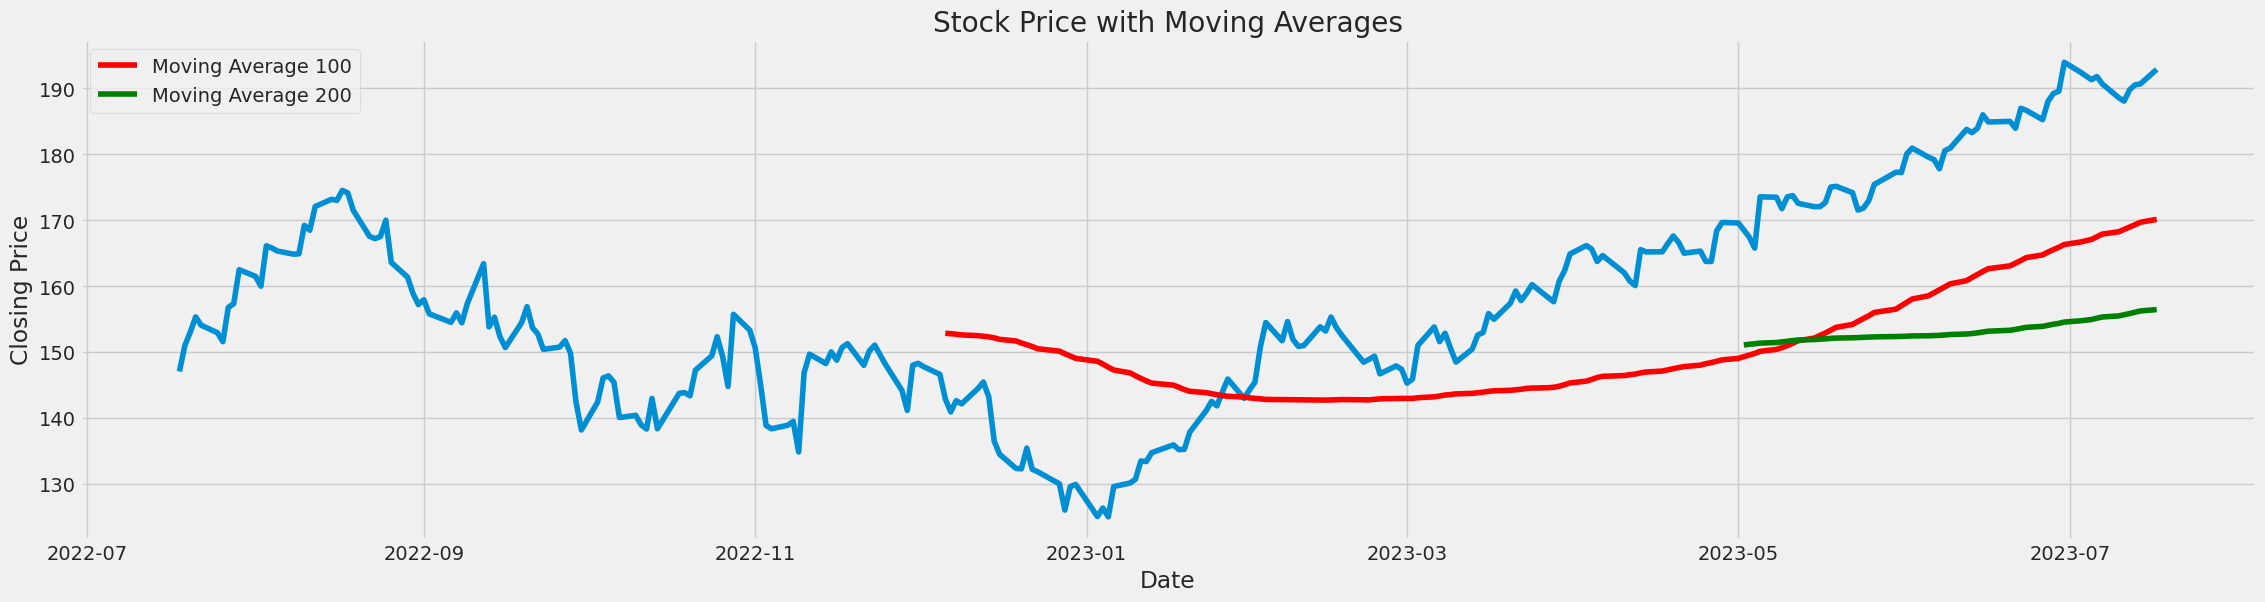

In [ ]:
#Plotting the MA 100+200
#Implementing 100day moving average
ma100 = df.Close.rolling(100).mean()
#Implementing 200day moving average
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize= (25, 100))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.plot(df.Close)
plt.plot(ma100, 'r', label='Moving Average 100')
plt.plot(ma200, 'g', label='Moving Average 200')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price with Moving Averages')

<ipython-input-12-138503d5cada>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormap = df.corr()


<Axes: >

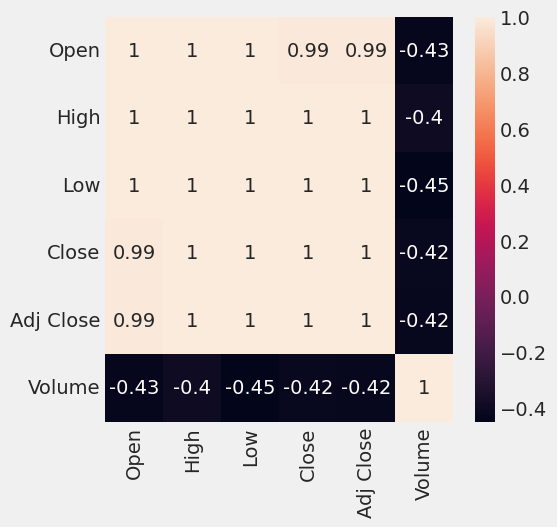

In [ ]:
cormap = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [ ]:
def get_corelated_col(cor_dat, threshold):
  # Cor_data to be column along which corelation to be measured
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df


In [ ]:
top_corelated_values = get_corelated_col(cormap['Close'], 0.60)
top_corelated_values

,corr value
Open,0.989648
High,0.996025
Low,0.996011
Close,1.000000
Adj Close,0.999883


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name'], dtype='object')

In [ ]:
df = df[top_corelated_values.index]
df.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-07-18,150.740005,151.570007,146.699997,147.070007,146.197037
2022-07-19,147.919998,151.229996,146.910004,151.000000,150.103699
2022-07-20,151.119995,153.720001,150.369995,153.039993,152.131577
2022-07-21,154.500000,155.570007,151.940002,155.350006,154.427887
2022-07-22,155.389999,156.279999,153.410004,154.089996,153.175354


In [ ]:
df.shape

(1258, 5)

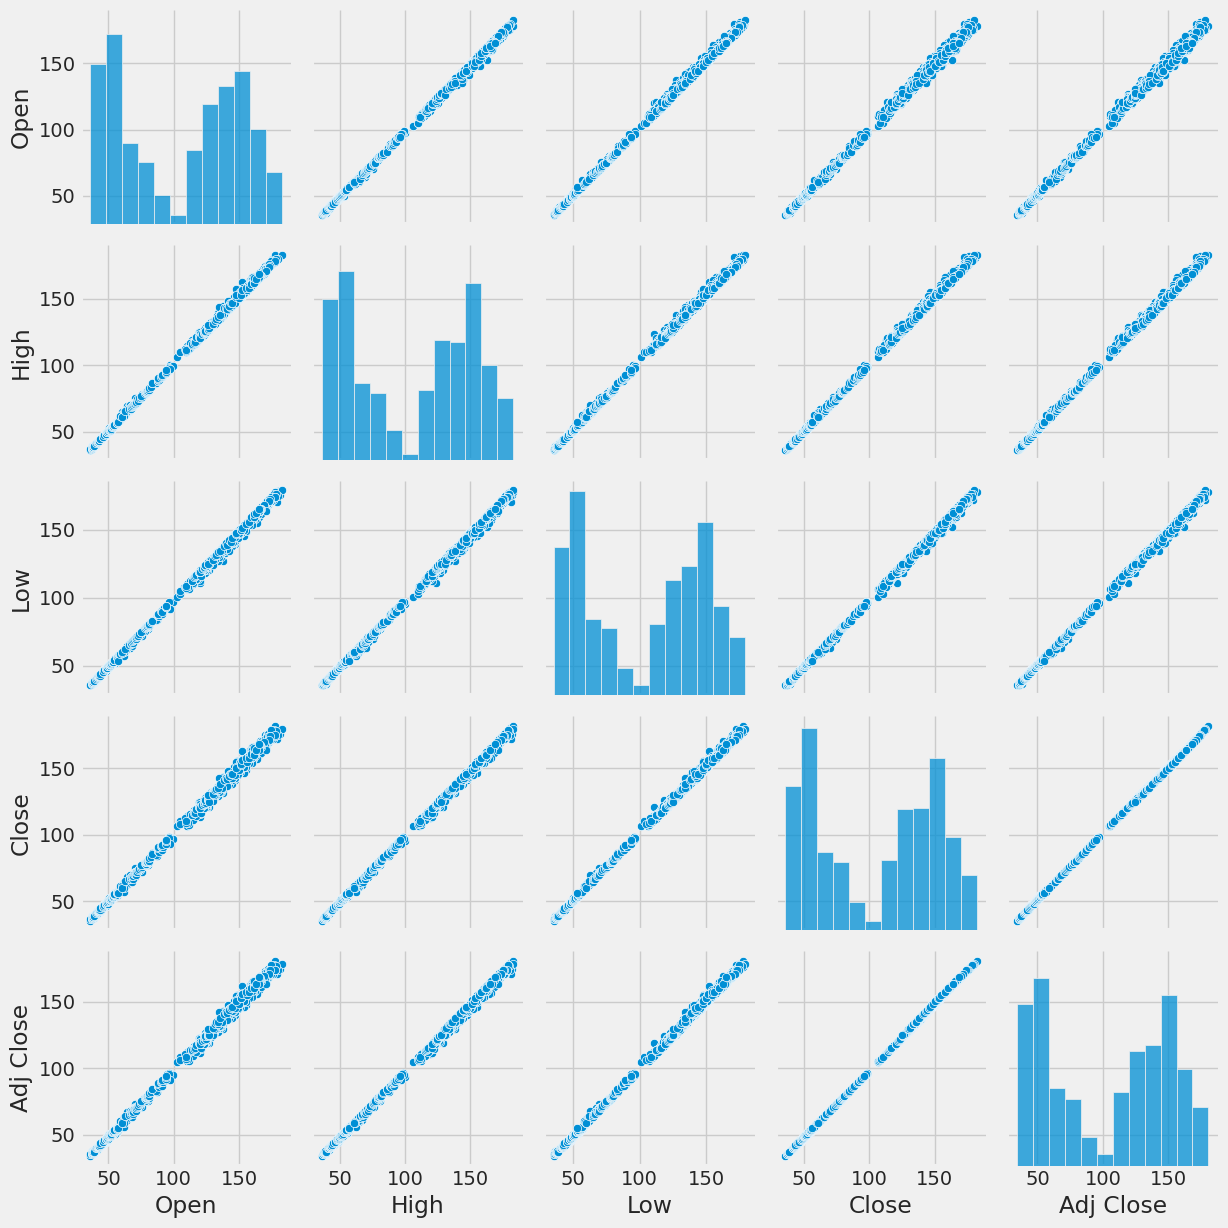

In [ ]:
sns.pairplot(df)
plt.tight_layout()

In [ ]:
X = df.drop(['Close'], axis=1)
y = df['Close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Open,High,Low,Adj Close
0,0.364911,0.356768,0.333087,0.310765
1,0.323299,0.351671,0.336192,0.367128
2,0.370518,0.388997,0.387345,0.396384
3,0.420392,0.416729,0.410556,0.429514
4,0.433525,0.427372,0.432289,0.411443


In [ ]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [ ]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [ ]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
Date,,
2023-05-03,167.449997,167.844244
2023-05-04,165.789993,166.081450
2023-05-05,173.570007,173.888573
2023-05-08,173.500000,173.750341
2023-05-09,171.770004,172.066700


In [ ]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9950053311091952


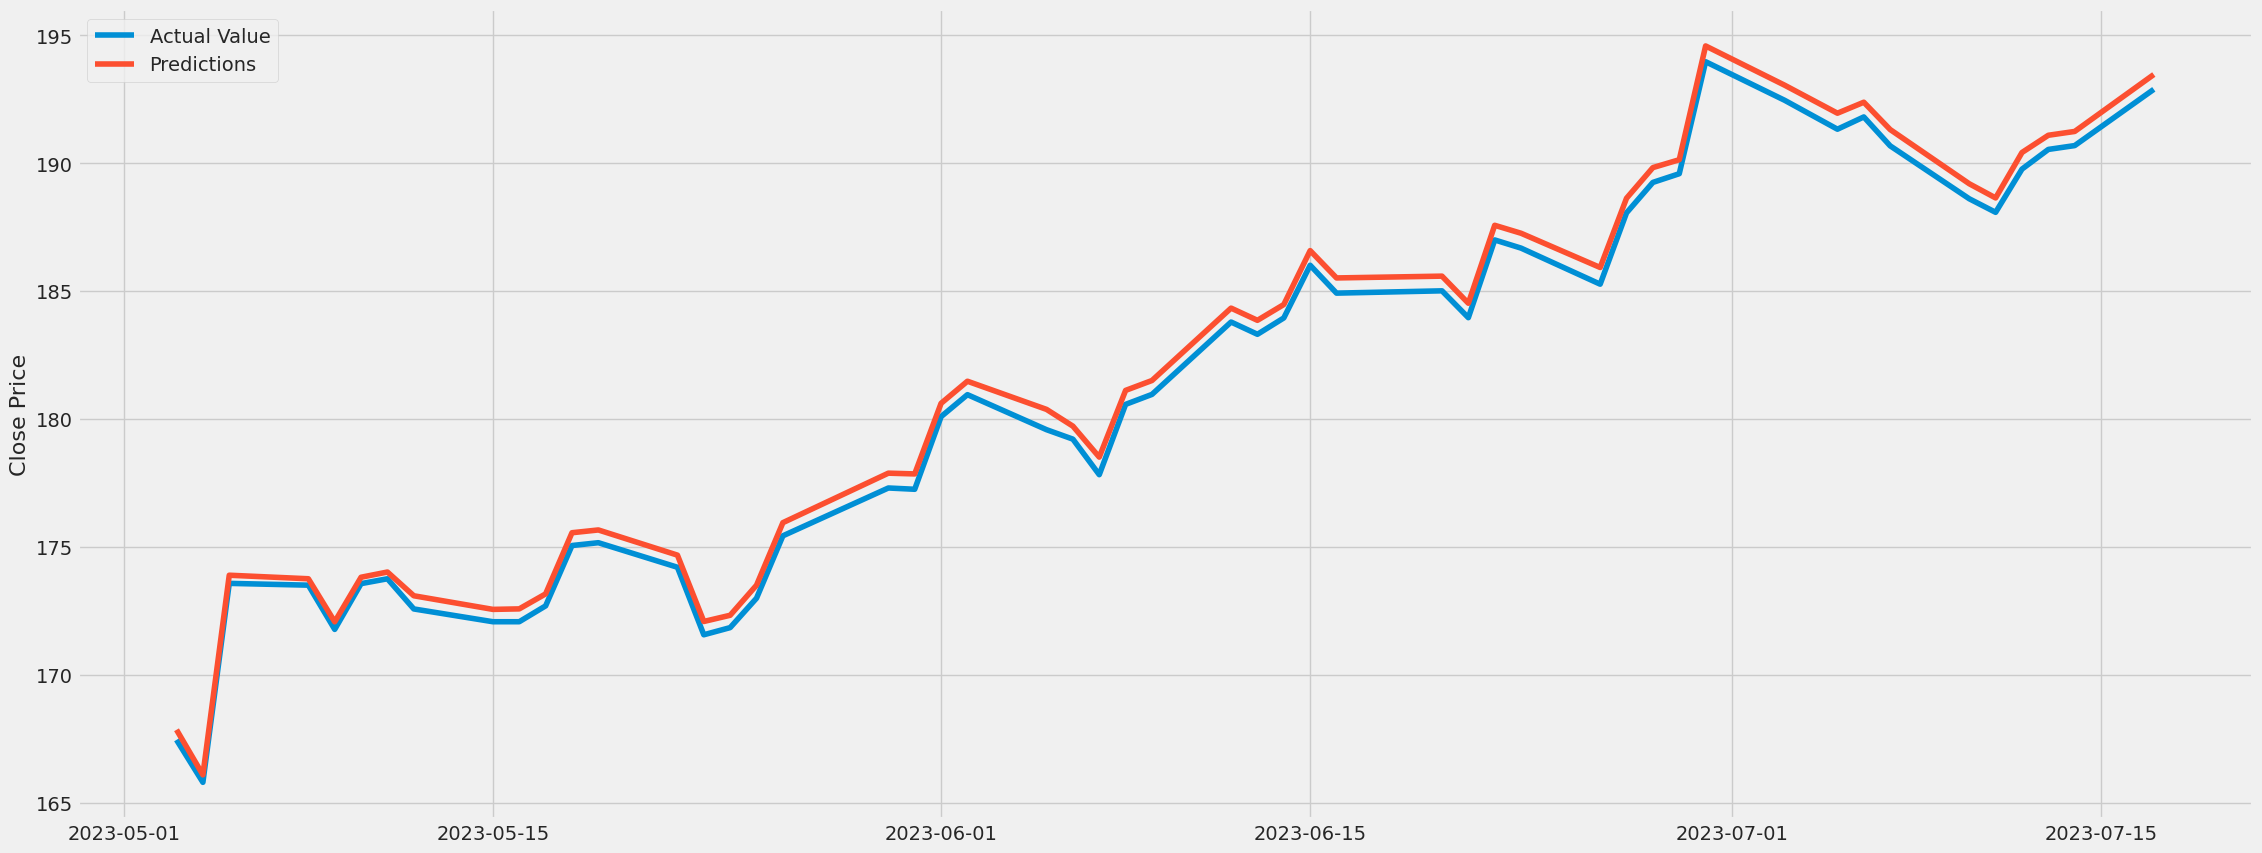

In [ ]:
plt.figure(figsize=(25,10))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred_1)
rmse = mean_squared_error(y_test, y_pred_1, squared=False)

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 0.5253545843951014
RMSE: 0.5365871010280163
